**Overview:**

Title: Stock Market Analysis: A Data Analytics Project

This project focuses on predicting stock market trends using advanced data analytics techniques. Leveraging historical stock data, technical indicators, and machine learning models, the aim is to develop a reliable system that can deliver actionable insights to support effective investment decisions. The project utilizes a decade’s worth of data and various tools for modeling, visualization, and evaluation to optimize stock predictions and portfolio strategies.

Objectives:

Predict stock price trends to minimize investment risks and maximize returns.

Build and validate predictive models using historical and real-time data.

Provide data-driven insights to guide asset allocation and investment planning.

Expected Outcome:

Predict daily closing prices of indices like the S&P 500 with high accuracy (targeting 85%).

Enable early detection of buy/sell signals and support risk-adjusted investment strategies.

**Problem Statement:**

Investors and traders often face challenges in predicting stock market movements due to market volatility and the influence of unpredictable external factors. Traditional investment strategies may not leverage the full potential of data-driven insights. This project aims to address the following core problem:

"How can we use historical stock data and machine learning techniques to accurately predict future stock trends and support more informed, low-risk investment decisions?"

The project seeks to reduce the guesswork involved in investing by applying predictive models like ARIMA and Random Forests on large-scale historical datasets, thereby offering better timing, risk assessment, and portfolio optimization.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stock_Market_Visualization.pbix to Stock_Market_Visualization.pbix


In [ ]:
import pandas as pd

In [ ]:
# Load the Excel file
df = pd.read_excel("stock_data_excel.xlsx", sheet_name="Sheet1")
df.head()

,Date,Company,Open,High,Low,Close,Prev Close,Market Cap,Sector Return (%),Market Return (%),Classification
0,2024-01-01,COMP001,525.70,532.01,525.59,528.93,523.61,232268.29,1.02,0.0,Short-Term
1,2024-01-01,COMP002,194.18,199.12,190.43,193.58,192.72,289926.52,0.45,0.0,Short-Term
2,2024-01-01,COMP003,207.05,209.70,200.68,203.40,206.03,67547.90,-1.28,0.0,Short-Term
3,2024-01-01,COMP004,656.03,661.15,654.93,656.82,654.46,106372.79,0.36,0.0,Short-Term
4,2024-01-01,COMP005,523.59,525.60,517.76,521.82,521.20,71726.17,0.12,0.0,Long-Term


**Cleaning and handling missing values**

In [ ]:
# STEP 2: Cleaning and Handling Missing Values (5 marks)
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date                 0
Company              0
Open                 0
High                 0
Low                  0
Close                0
Prev Close           0
Market Cap           0
Sector Return (%)    0
Market Return (%)    0
Classification       0
dtype: int64


In [ ]:
# Confirm all missing values handled
print("After cleaning:")
print(df.isnull().sum())

After cleaning:
Date                 0
Company              0
Open                 0
High                 0
Low                  0
Close                0
Prev Close           0
Market Cap           0
Sector Return (%)    0
Market Return (%)    0
Classification       0
dtype: int64


** Feature Selection and Engineering**

In [ ]:

# STEP 3: Feature Selection and Engineering (5 marks)
df['Price Range'] = df['High'] - df['Low']
df['Daily Return (%)'] = ((df['Close'] - df['Open']) / df['Open']) * 100

In [ ]:
# Drop unneeded column
df = df.drop(['Prev Close'], axis=1)
df.head()

,Date,Company,Open,High,Low,Close,Market Cap,Sector Return (%),Market Return (%),Classification,Price Range,Daily Return (%)
0,2024-01-01,COMP001,525.70,532.01,525.59,528.93,232268.29,1.02,0.0,Short-Term,6.42,0.614419
1,2024-01-01,COMP002,194.18,199.12,190.43,193.58,289926.52,0.45,0.0,Short-Term,8.69,-0.308992
2,2024-01-01,COMP003,207.05,209.70,200.68,203.40,67547.90,-1.28,0.0,Short-Term,9.02,-1.762859
3,2024-01-01,COMP004,656.03,661.15,654.93,656.82,106372.79,0.36,0.0,Short-Term,6.22,0.120421
4,2024-01-01,COMP005,523.59,525.60,517.76,521.82,71726.17,0.12,0.0,Long-Term,7.84,-0.338051


**Ensuring Data Integrity and Consistency **

In [ ]:
# STEP 4: Ensuring Data Integrity and Consistency (4 marks)
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates found: 0


In [ ]:
# Ensure correct data types
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.dtypes)

Date                 datetime64[ns]
Company                      object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Market Cap                  float64
Sector Return (%)           float64
Market Return (%)           float64
Classification               object
Price Range                 float64
Daily Return (%)            float64
dtype: object


**Summary Statistics and Insights**

In [ ]:
# STEP 5: Summary Statistics and Insights (4 marks)
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                      Date         Open         High          Low  \
count                 1500  1500.000000  1500.000000  1500.000000   
mean   2024-01-05 12:00:00   554.835513   558.676747   551.041280   
min    2024-01-01 00:00:00    98.250000    99.520000    93.530000   
25%    2024-01-03 00:00:00   332.232500   335.845000   328.087500   
50%    2024-01-05 12:00:00   550.650000   555.280000   548.105000   
75%    2024-01-08 00:00:00   790.532500   792.152500   785.152500   
max    2024-01-10 00:00:00  1009.000000  1013.030000  1008.400000   
std                    NaN   261.363212   261.368888   261.464985   

             Close    Market Cap  Sector Return (%)  Market Return (%)  \
count  1500.000000    1500.00000        1500.000000        1500.000000   
mean    554.858407  277622.77550           0.507467           1.353727   
min      96.730000   50050.92000          -2.640000           0.000000   
25%     332.117500  161315.72000          -0.082500           

**Insights by Classification**

In [ ]:
# Insights by Classification
print("Mean returns by classification:")
print(df.groupby("Classification")[["Daily Return (%)", "Sector Return (%)"]].mean())

Mean returns by classification:
                Daily Return (%)  Sector Return (%)
Classification                                     
Long-Term              -0.027387           0.470896
Short-Term              0.016962           0.542792


**Identifying Patterns, Trends, and Anomalies**

In [ ]:

# STEP 6: Identifying Patterns, Trends, and Anomalies (5 marks)
import seaborn as sns
import matplotlib.pyplot as plt

**Identifying patterns, trends and anamolies and returns**

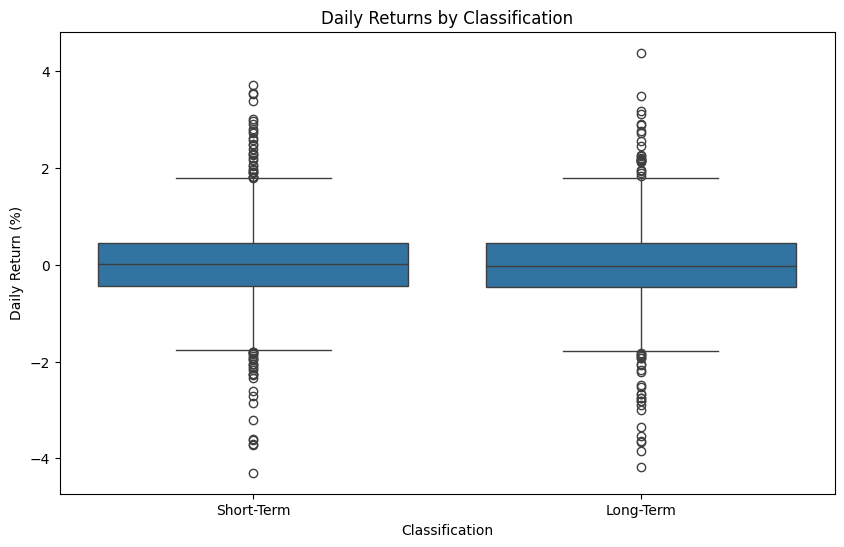

In [ ]:
# Boxplot for pattern in returns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Classification', y='Daily Return (%)')
plt.title("Daily Returns by Classification")
plt.show()

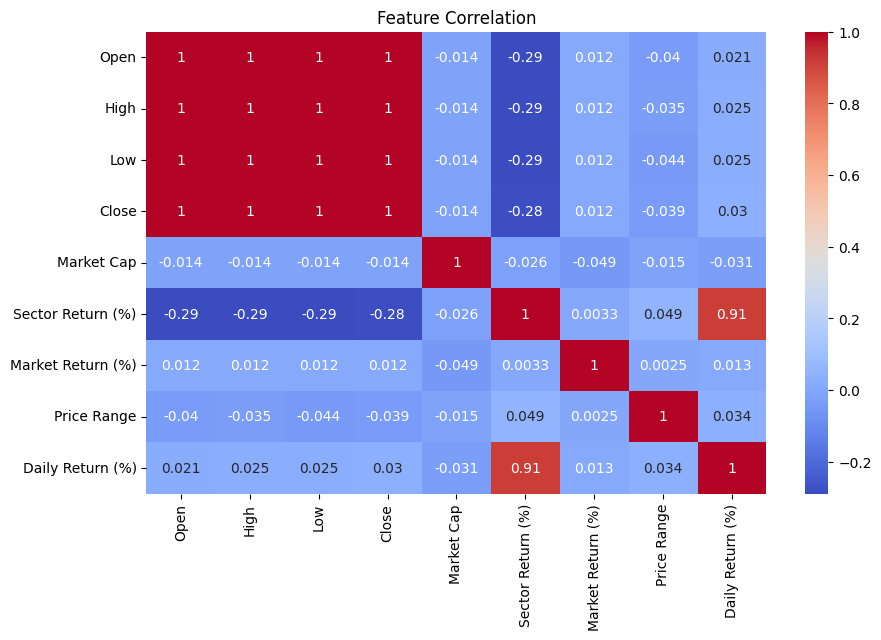

In [ ]:
# Heatmap for feature correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

**Handling Outliers and Data Transformations**

In [ ]:
# STEP 7: Handling Outliers and Data Transformations (3 marks)
from scipy import stats
import numpy as np

In [ ]:
# Z-score method to remove outliers in Daily Return
z_scores = np.abs(stats.zscore(df['Daily Return (%)']))
df = df[(z_scores < 3)]

In [ ]:
# Log transform Market Cap
df['Log Market Cap'] = np.log(df['Market Cap'])

**Initial Visual Representation of Key Findings**

<Axes: title={'center': 'Stock Type Distribution'}, ylabel='count'>

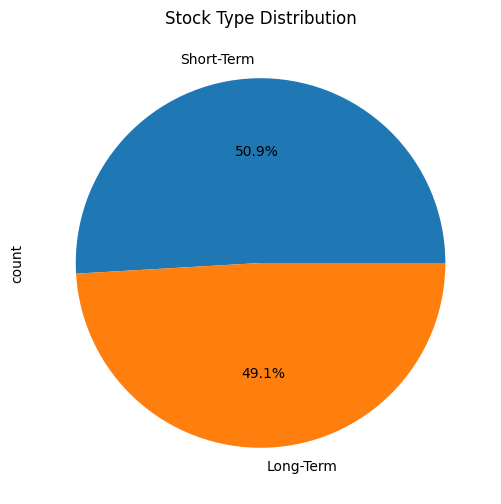

In [ ]:
# STEP 8: Initial Visual Representation of Key Findings (4 marks)
# Pie chart of classification
df['Classification'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Stock Type Distribution")

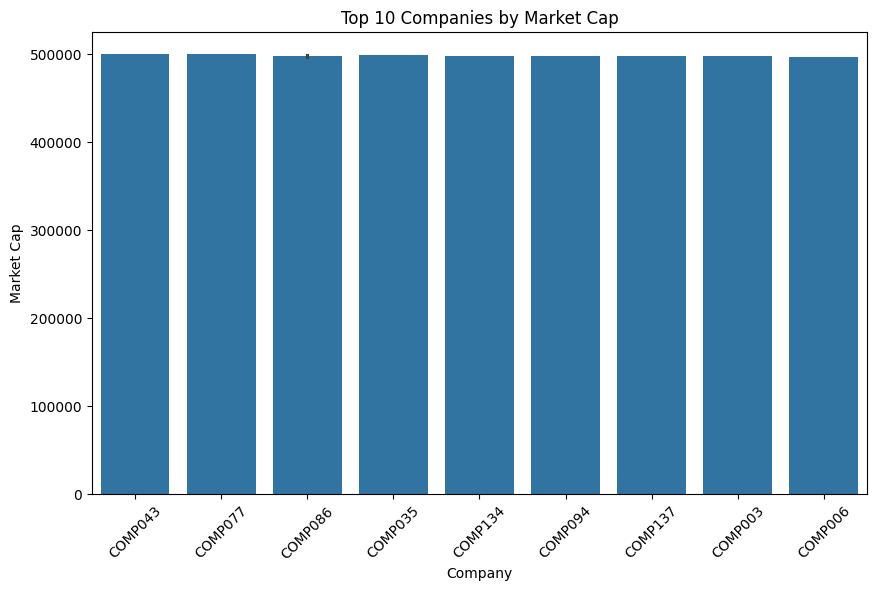

In [ ]:
# Barplot of top 10 companies by Market Cap
top10 = df.sort_values(by='Market Cap', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Company', y='Market Cap', data=top10)
plt.title("Top 10 Companies by Market Cap")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock_data_excel.csv to stock_data_excel.csv


In [ ]:
# 📌 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 📥 Load Dataset
df = pd.read_csv("stock_data_excel.csv")  # Update path if needed
df.head()

,Date,Company,Open,High,Low,Close,Prev Close,Market Cap,Sector Return (%),Market Return (%),Classification
0,2024-01-01,COMP001,525.70,532.01,525.59,528.93,523.61,232268.29,1.02,0.0,Short-Term
1,2024-01-01,COMP002,194.18,199.12,190.43,193.58,192.72,289926.52,0.45,0.0,Short-Term
2,2024-01-01,COMP003,207.05,209.70,200.68,203.40,206.03,67547.90,-1.28,0.0,Short-Term
3,2024-01-01,COMP004,656.03,661.15,654.93,656.82,654.46,106372.79,0.36,0.0,Short-Term
4,2024-01-01,COMP005,523.59,525.60,517.76,521.82,521.20,71726.17,0.12,0.0,Long-Term


<ipython-input-31-76af1f3dc1f1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




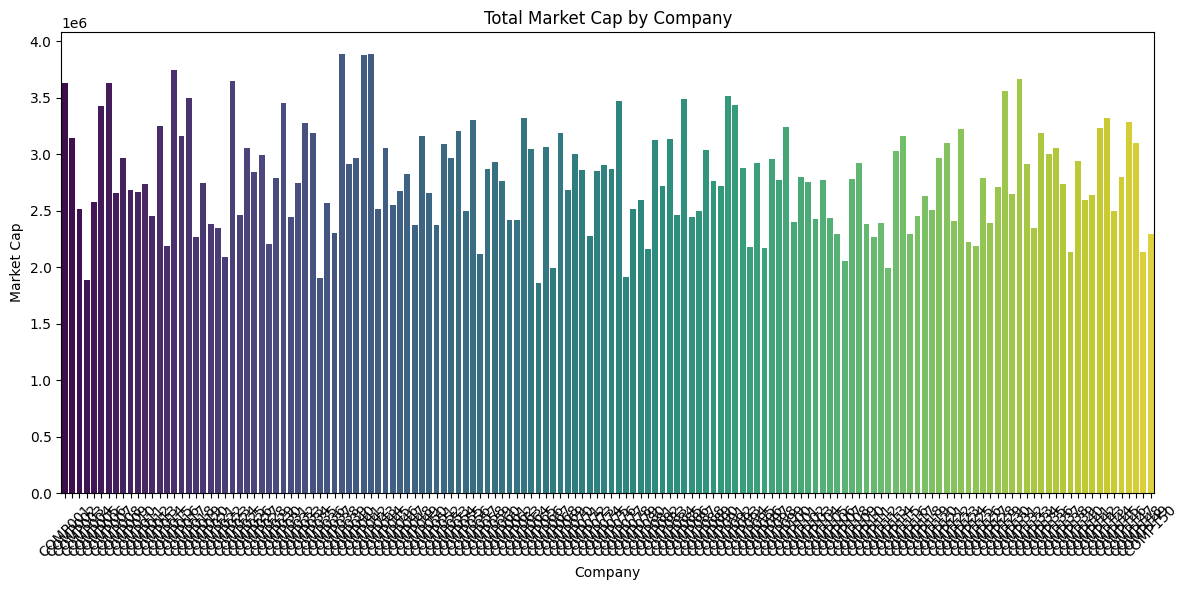

In [31]:
bar_data = df.groupby('Company')['Market Cap'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Market Cap', data=bar_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Market Cap by Company')
plt.tight_layout()
plt.show()

In [ ]:
pie_data = df['Classification'].value_counts().reset_index()
pie_data.columns = ['Sector', 'Count']

fig = px.pie(pie_data, names='Sector', values='Count',
             title='Sector-wise Distribution of Stocks', hole=0.3)
fig.show()


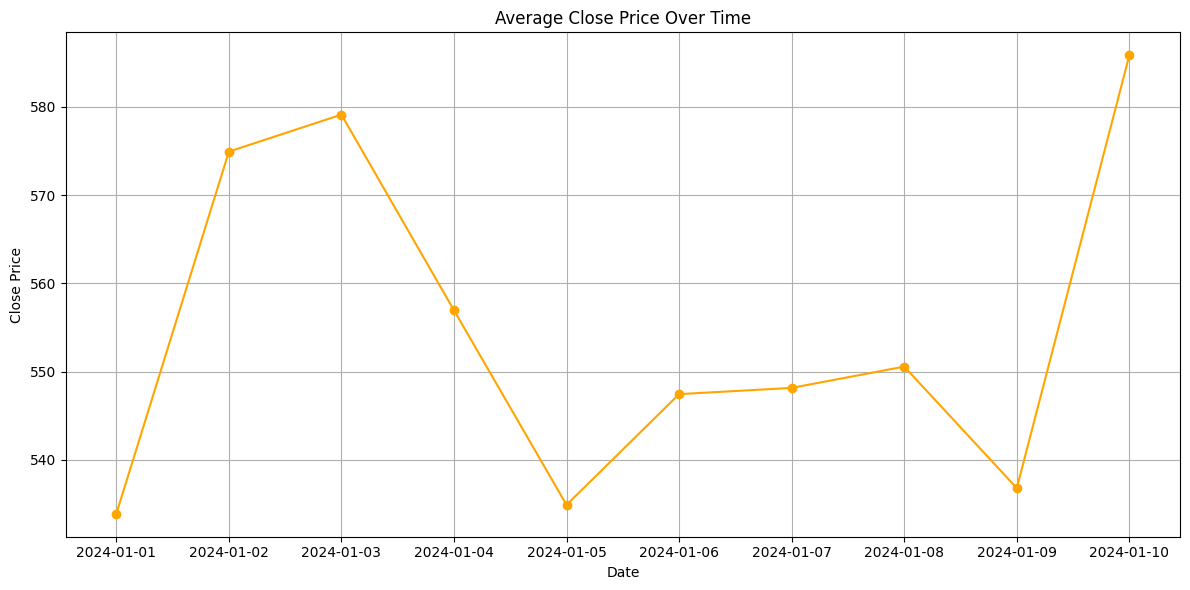

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
line_data = df.groupby(['Date'])['Close'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(line_data['Date'], line_data['Close'], marker='o', color='orange')
plt.title('Average Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter(df, x='Market Cap', y='Close',
                 color='Classification', hover_data=['Company'],
                 size='Market Cap', title='Market Cap vs Close Price')
fig.show()

In [ ]:
area_data = df.groupby(['Date', 'Classification'])['Sector Return (%)'].mean().reset_index()
area_data['Date'] = pd.to_datetime(area_data['Date'])

fig = px.area(area_data, x='Date', y='Sector Return (%)', color='Classification',
              title='Aggregated Sector Return Over Time')
fig.show()